### FLiBe Simple

In [1]:
import openmc
import os, sys
from pathlib import Path
import numpy as np

# Import helper functions
sys.path.insert(0, f"{Path.cwd()}/helper")
from utilities import *

### Materials
FLiBe density is 1.94 g/cm$^3$ with 7.5% Li-6 enrichment. In the FLiBe, molar ratio of 2 LiF per BeF$_2$. The system is a volume of 342 m$^3$ at 900 K. We increase tons of U in the system, subtracting FLiBe, from 0 to 50 metric tons (MTU).

> [$\S$2.4] In this work, we investigate what happens when fertile species (U-238 or Th-232) are introduced to the FLiBe LIB in amounts ranging from 5 to 50 metric tons, corresponding to a maximum molar percentage of 1.81% and 1.84% for UF4 and ThF4 respectively, assuming a blanket volume of 342 m$^3$.
>
> [$\S$3.1] The total volume of FLiBe in the model is 342 m$^3$, with no additional volume added to account for FLiBe in other systems like pumps or heat exchangers. This results in a fertile mass loading of $2.92\times10^{−2}$ g cm$^{−3}$ metric ton of fertile material. For this study, examining a range of 5 to 50 metric tons of fertile material, this corresponds to a fertile mass density range of 0.146-1.46 g cm$^{−3}$.

In [35]:
""" USER SPECIFICATIONS"""
DENSITY_TRISO = 7 # g/cm3
ENRICH_LI = 60 # wt%
ENRICH_U  = 0.7204 # wt% 
TEMP_K = 900 # K
VOL_CC = 342 * 1e6 # cm3
MASS_U_LIST = [0, 0.1, 0.2, 0.5, 1, 2.5, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] # metric tons uranium (MTU)

In [36]:
""" MATERIALS """
# Eurofer
eurofer = openmc.Material(name='Eurofer')
eurofer.add_element('Fe', 89.0026, percent_type='wo')
eurofer.add_element('B', 0.001, percent_type='wo')
eurofer.add_element('C', 0.1049, percent_type='wo')
eurofer.add_element('N', 0.04, percent_type='wo')
eurofer.add_element('O', 0.001, percent_type='wo')
eurofer.add_element('Al', 0.004, percent_type='wo')
eurofer.add_element('Si', 0.026, percent_type='wo')
eurofer.add_element('P', 0.002, percent_type='wo')
eurofer.add_element('S', 0.003, percent_type='wo')
eurofer.add_element('Ti', 0.001, percent_type='wo')
eurofer.add_element('V', 0.01963, percent_type='wo')
eurofer.add_element('Cr', 9.00, percent_type='wo')
eurofer.add_element('Mn', 0.55, percent_type='wo')
eurofer.add_element('Co', 0.005, percent_type='wo')
eurofer.add_element('Ni', 0.01, percent_type='wo')
eurofer.add_element('Cu', 0.003, percent_type='wo')
eurofer.add_element('Nb', 0.005, percent_type='wo')
eurofer.add_element('Mo', 0.003, percent_type='wo')
eurofer.add_element('Ta', 0.12, percent_type='wo')
eurofer.add_element('W', 1.0987, percent_type='wo')

# Lithium ceramic
lithium_ceramic = openmc.Material(name='LithiumCeramic')
lithium_ceramic.add_element('Li', 22.415, percent_type='wo', enrichment_target='Li6', enrichment_type='wo', enrichment=ENRICH_LI)
lithium_ceramic.add_element('Si', 24.077, percent_type='wo')
lithium_ceramic.add_element('O', 53.39, percent_type='wo')
lithium_ceramic.add_element('Al', 0.003, percent_type='wo')
lithium_ceramic.add_element('C', 0.1, percent_type='wo')
lithium_ceramic.add_element('Ca', 0.003, percent_type='wo')
lithium_ceramic.add_element('Co', 0.0002, percent_type='wo')
lithium_ceramic.add_element('Cr', 0.0001, percent_type='wo')
lithium_ceramic.add_element('Cu', 0.0001, percent_type='wo')
lithium_ceramic.add_element('Fe', 0.0005, percent_type='wo')
lithium_ceramic.add_element('K', 0.0001, percent_type='wo')
lithium_ceramic.add_element('Mg', 0.0005, percent_type='wo')
lithium_ceramic.add_element('Mn', 0.0001, percent_type='wo')
lithium_ceramic.add_element('Pt', 0.009, percent_type='wo')
lithium_ceramic.add_element('Na', 0.002, percent_type='wo')
lithium_ceramic.add_element('Ni', 0.0002, percent_type='wo')
lithium_ceramic.add_element('Ti', 0.0005, percent_type='wo')
lithium_ceramic.add_element('Zn', 0.0002, percent_type='wo')
lithium_ceramic.add_element('Zr', 0.0001, percent_type='wo')

# Beryllium
beryllium = openmc.Material(name='Beryllium')
beryllium.add_element('Be', 98.749, percent_type='wo')
beryllium.add_element('O', 0.9, percent_type='wo')
beryllium.add_element('Al', 0.09, percent_type='wo')
beryllium.add_element('Fe', 0.1, percent_type='wo')
beryllium.add_element('Mg', 0.08, percent_type='wo')
beryllium.add_element('Si', 0.06, percent_type='wo')
beryllium.add_element('Mn', 0.01, percent_type='wo')
#Beryllium has a natural amount of Uranium that is already an activation risk
#when I add the number fo triso's i need to accieve my desired U238 mass
# The whole sustem has a U238 mass > than expected due to the Uranium in Beryllium
beryllium.add_element('U', 0.01, percent_type='wo')
beryllium.add_element('Co', 0.001, percent_type='wo')
beryllium.add_element('Cu', 0.001, percent_type='wo')
beryllium.add_element('Fe', 0.003, percent_type='wo')
beryllium.add_element('K', 0.001, percent_type='wo')
beryllium.add_element('Mg', 0.0005, percent_type='wo')
beryllium.add_element('Mn', 0.0005, percent_type='wo')
beryllium.add_element('Na', 0.001, percent_type='wo')
beryllium.add_element('Nb', 0.001, percent_type='wo')
beryllium.add_element('Ni', 0.0005, percent_type='wo')
beryllium.add_element('Pb', 0.0005, percent_type='wo')
beryllium.add_element('Ta', 0.002, percent_type='wo')

# #Tungsten
# tungsten = openmc.Material(name='Tungsten')
# tungsten.add_element('W', 99.9595, percent_type='wo')
# tungsten.add_element('Ag', 0.001, percent_type='wo')
# tungsten.add_element('Al', 0.0015, percent_type='wo')
# tungsten.add_element('As', 0.0005, percent_type='wo')
# tungsten.add_element('Ba', 0.0005, percent_type='wo')
# tungsten.add_element('Ca', 0.0005, percent_type='wo')
# tungsten.add_element('Cd', 0.0005, percent_type='wo')
# tungsten.add_element('Co', 0.001, percent_type='wo')
# tungsten.add_element('Cr', 0.002, percent_type='wo')
# tungsten.add_element('Cu', 0.001, percent_type='wo')
# tungsten.add_element('Fe', 0.003, percent_type='wo')
# tungsten.add_element('K', 0.001, percent_type='wo')
# tungsten.add_element('Mg', 0.0005, percent_type='wo')
# tungsten.add_element('Mn', 0.0005, percent_type='wo')
# tungsten.add_element('Na', 0.001, percent_type='wo')
# tungsten.add_element('Nb', 0.001, percent_type='wo')
# tungsten.add_element('Ni', 0.0005, percent_type='wo')
# tungsten.add_element('Pb', 0.0005, percent_type='wo')
# tungsten.add_element('Ta', 0.002, percent_type='wo')
# tungsten.add_element('Balance', 0.022, percent_type='wo')

# ceramic TRISO -- neglect buoyancy effects --ezoccoli 2025-07-07
fuel = openmc.Material(name='Fuel')
fuel.set_density('g/cm3', 10.5)
fuel.add_nuclide('U235', 4.6716e-02)
fuel.add_nuclide('U238', 2.8697e-01)
fuel.add_nuclide('O16',  5.0000e-01)
fuel.add_element('C', 1.6667e-01)
Mu238 = fuel.get_mass_density('U238') 
Mfuel = fuel.density #used to compute mass fraction of U238 in fuel
# #calculate total fuel mass given a mass of U238 (MASS_U_LIST)
# coating for TRISO
SiC = openmc.Material(name='SiC')
SiC.set_density('g/cm3', 3.2)
SiC.add_element('C', 0.5)
SiC.add_element('Si', 0.5)

radius_fuel = 400e-4   # 400 μm = 0.0400 cm
radius_sic  = 500e-4   # 500 μm = 0.0500 cm
vol_tot  = (4/3) * np.pi * (radius_sic)**3
vol_fuel = (4/3) * np.pi * (radius_fuel)**3
vf_fuel = vol_fuel / vol_tot
vf_sic = 1.0 - vf_fuel


triso = openmc.Material.mix_materials([fuel, SiC], [vf_fuel, vf_sic], 'vo')

he = openmc.Material(name='Helium')
he.set_density('g/cm3', 0.0001785)
he.add_element('He', 1)

# Calculate volume ratios of TRISO vs PbLi+structure, ensure they add up to 1
mix_list = []
for mtu in MASS_U_LIST:
    mass_fuel = mtu * 10**6 * (Mfuel / Mu238)
    V_fuel = mass_fuel / 10.5 #mass over fuel density
    V_triso = V_fuel / vf_fuel 

    vf_triso = V_triso / (VOL_CC * 0.1304)
    vf_lic = 1 - vf_triso
    licTRISO = openmc.Material.mix_materials([lithium_ceramic, triso], [vf_lic, vf_triso], 'vo') # fractions in 'mix_materials' MUST add up to 1
    licTRISO.volume = 0.1304 * VOL_CC
    vf_licTRISO = 0.1304
    vf_be = 0.379
    vf_euro = 0.1176 #volume fractions from EU Activation Analysis Table 2
    vf_he = 1 - (vf_licTRISO + vf_be + vf_euro)
    mix = openmc.Material.mix_materials([licTRISO, he, eurofer, beryllium],[vf_licTRISO, vf_he, vf_euro, vf_be],'vo')
    mix.name = 'Full Lithium Ceramic + TRISO Blanket Homogenized'
    mix.temperature = TEMP_K
    mix.volume = VOL_CC
    triso.volume = V_triso
    print(mix.get_nuclide_atom_densities())
    print(mix.get_mass_density)
    mix_list.append(mix)

materials = openmc.Materials(mix_list)

In [40]:
# Get various specs for double-checking
print(f"U-238 mass: {licTRISO.get_mass('U238')}")
print(f"Mix with {MASS_U_LIST[-1]} MTU")
print(f"Mix density: {mix_list[-1].get_mass_density():.6f}")
print(f"U-238 number density: {mix_list[-1].get_nuclide_atom_densities('U238')}")
print(f"U-238 mass: {mix_list[-1].get_mass('U238')}")
print(f"Li-6 number density: {mix_list[-1].get_nuclide_atom_densities('Li6')}\n")
print("U-238 mass in total mix greater than expected due to the natural uranium in beryllium.\n"
      "Therefore, in the 0-ton test case, we still have a naturally occurring fraction of uranium in the mix.\n")


U-238 mass: 49999999.999999955
Mix with 50 MTU
Mix density: 1860.804597
U-238 number density: {'U238': 0.0005132445219666357}
U-238 mass: 69385568.00174175
Li-6 number density: {'Li6': 2.7483281532197825}

U-238 mass in total mix greater than expected due to the natural uranium in beryllium.
Therefore, in the 0-ton test case, we still have a naturally occurring fraction of uranium in the mix.



In [41]:
""" CROSS SECTIONS 
Temporary solution for finding xs files between WSL and Ubuntu on Computing Cluster without editing PATH --ppark 2025-06-28 
"""
xs_path_ubuntu = '/opt/openmc_data/endfb-viii.0-hdf5/cross_sections.xml'
xs_path_wsl   = '/mnt/c/openmc/data/endfb-viii.0-hdf5/cross_sections.xml'
if os.path.isfile(xs_path_ubuntu):
    materials.cross_sections = xs_path_ubuntu # use this on Zotacs --ppark
elif os.path.isfile(xs_path_wsl):
    materials.cross_sections = xs_path_wsl
else:
    print(f"Error finding cross section XML!")
    # sys.exit(2)

#### Geometry
For our simple case suppose we make a 1 m$^3$ cube with reflective surfaces of homogeneous FLiBe. 

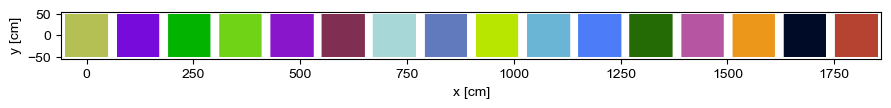

In [42]:
""" GEOMETRY """
cells, pitch, half_box = [], 120, 50 # +/- 50 cm bounds
box_centers = [pitch * i for i in range(len(MASS_U_LIST))] # used in Sources

for i, material in enumerate(mix_list):
    x_min = openmc.XPlane(x0= -half_box + box_centers[i], boundary_type='reflective')
    x_max = openmc.XPlane(x0=  half_box + box_centers[i], boundary_type='reflective')
    y_min, y_max = openmc.YPlane(-50, boundary_type='reflective'), openmc.YPlane( 50, boundary_type='reflective')
    z_min, z_max = openmc.ZPlane(-50, boundary_type='reflective'), openmc.ZPlane( 50, boundary_type='reflective')
    region = +x_min & -x_max & +y_min & -y_max & +z_min & -z_max
    
    cell = openmc.Cell(fill=material, region=region)
    cell.name = f"mix-{i+1}"
    cells.append(cell)

root_univ = openmc.Universe(cells=cells) # Create root universe with all material cells
root_univ.plot(width=(pitch * len(MASS_U_LIST), 110), origin=(pitch * (len(MASS_U_LIST) - 1) / 2, 0.0, 0.0)) # Visualize
geometry = openmc.Geometry(root_univ) # Set geometry

#### Settings
Here we define the other settings for our problem. 

In [43]:
""" TALLIES """
tallies = openmc.Tallies() # initialize

# Filters
cell_filter = openmc.CellFilter(cells)

E_bin_edges = logspace_per_decade(1e-5, 20e6, 100) # './helpers/utilities.py'
energy_filter = openmc.EnergyFilter(E_bin_edges)
# energy_filter = openmc.EnergyFilter([0., 0.625, 20.0e6])
# --Default thermal, intermediate, fast energy cutoffs in MCNP
# energy_filter = openmc.EnergyFilter.from_group_structure('CCFE-709')
# --These have extra bins in key energy ranges. A full list of energy structures is available here: --ppark 2025-06-27
#   https://github.com/openmc-dev/openmc/blob/6254be37582e09acff038f5656332b89e53e4eae/openmc/mgxs/__init__.py#L50-L420
filters = [energy_filter, cell_filter]

# Flux tally 
flux_tally = openmc.Tally(name='flux')
flux_tally.scores = ['flux'] # specific names required
flux_tally.filters = filters

# Uranium reaction rates
U_tally = openmc.Tally(name='uranium rxn rates')
U_tally.scores = ['(n,gamma)','fission', 'elastic'] # specific names required
U_tally.nuclides = ['U238', 'U235']
U_tally.filters = filters

# Lithium reaction rates
Li_tally = openmc.Tally(name='lithium rxn rates')
Li_tally.scores = ['(n,gamma)','(n,Xt)', 'elastic'] # specific names required
Li_tally.nuclides = ['Li6', 'Li7']
Li_tally.filters = filters

# Beryllium reaction rates
Be_tally = openmc.Tally(name='beryllium rxn rates')
Be_tally.scores = ['(n,gamma)','(n,2n)', 'elastic'] # specific names required
Be_tally.nuclides = ['Be9']
Be_tally.filters = filters

tallies.extend([flux_tally, U_tally, Li_tally, Be_tally])
# tallies.export_to_xml("./xml/tallies.xml") --don't need bc 'model.export_to_model_xml' below --ppark 2025-06-28

In [45]:
""" SETTINGS """
settings = openmc.Settings()

""" Source
Isotropic 14.07 MeV point source at center of each cube
"""
source = []
for p in box_centers:
    src = openmc.IndependentSource()
    src.space  = openmc.stats.Point((p,0,0))
    src.angle  = openmc.stats.Isotropic()
    src.energy = openmc.stats.Discrete([14.07e6], [1.0])
    source.append(src)
settings.source = source

""" Run type """
settings.run_mode = 'fixed source'
settings.particles = int(1e4) #test run, tiny number of neutrons
#settings.particles = len(MASS_U_LIST) * int(1e6)  #  for when we are actually running
settings.batches = 100

# settings.export_to_xml("./xml/settings.xml") # don't need bc 'model.export_to_model_xml' below --ppark 2025-06-28

#### Run OpenMC
Change the current model to export from 'model.export_to_model_xml("./model_Pebble/")'
to "./model_Pebble1/" and the `Pebble-Plots.ipynb` statepoint to match. Else you will get:
``` 
ERROR: Failed to open HDF5 file with mode ‘w’: summary.h5 
```
If you do, close all opened scripts, shut down all kernels, and then restart them with this new name.
Change the name back and forth for each run to ensure you are not overwiting an open file.

In [46]:
model = openmc.model.Model(geometry, materials, settings, tallies)
model.export_to_model_xml("./model_Pebble/")  
results_NSlow = model.run(cwd="./model_Pebble/") 

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Pb207 from /opt/openmc_data/endfb-viii.0-hdf5/neutron/Pb207.h5
 Reading Pb208 from /opt/openmc_data/endfb-viii.0-hdf5/neutron/Pb208.h5
 Minimum neutron data temperature: 900 K
 Maximum neutron data temperature: 900 K
 Preparing distributed cell instances...
 Writing summary.h5 file...
 Maximum neutron transport energy: 20000000 eV for Li6

 ===============>     FIXED SOURCE TRANSPORT SIMULATION     <===============

 Simulating batch 1
 Simulating batch 2
 Simulating batch 3
 Simulating batch 4
 Simulating batch 5
 Simulating batch 6
 Simulating batch 7
 Simulating batch 8
 Simulating batch 9
 Simulating batch 10
 Simulating batch 11
 Simulating batch 12
 Simulating batch 13
 Simulating batch 14
 Simulating batch 15
 Simulating batch 16
 Simulating batch 17
 Simulating batch 18
 Simulating batch 19
 Simulating batch 20
 Simulating batch 21
 Simulating batch 22
 Simulating batch 23
 Simulating batch 24
 Simulating batch 25
 Simulating batch 26
 Simulating batch 27
 Simulating b